In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

### Importing my libraries data [changing to geo]  and my nashville map

(-87.08182285612493, -86.48832059875873, 35.945865086683014, 36.42758826064042)

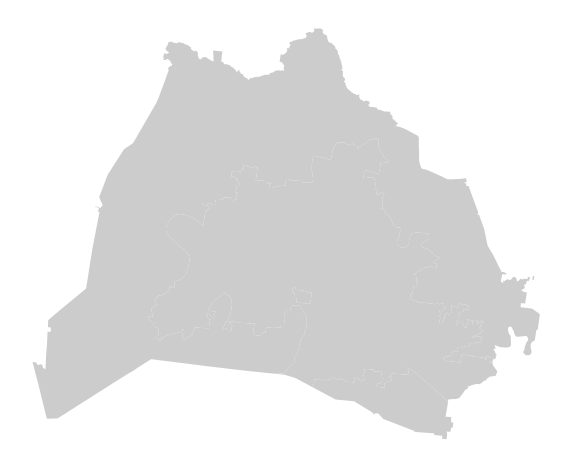

In [2]:
nash = gpd.read_file('./data/nashville_map.geojson')
ax = nash.plot(figsize = (10,10), color = '#cccccc')
ax.axis('off')

In [3]:
library = pd.read_csv('./data/libraries.csv')
## creating my geometry for library

library['geometry'] = library.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
library_geo = gpd.GeoDataFrame(library, crs = nash.crs, geometry = library['geometry'])

In [4]:
projects = pd.read_csv('./data/Metro_Public_Works_Capital_Projects.csv')
projects['geometry'] = projects.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
projects_geo = gpd.GeoDataFrame(projects, crs = nash.crs, geometry = projects['geometry'])
type(projects_geo)

geopandas.geodataframe.GeoDataFrame

###### Here is my geo

### Checking the files

In [5]:
nash.head(1)

,area_sq_mi,name,objectid,geometry
0,198,Urban Services District,0,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."


In [6]:
library.head(1)

,notes,latitude,longitude,location/human_address,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,library_name,library_photo_url/url,library_photo_url/description,phone_number,...,:@computed_region_gxvr_9jxz,:@computed_region_gisn_y5cm,:@computed_region_c9xn_skx3,:@computed_region_f73m_vb2k,sunday_opening_time,:@computed_region_cfa7_hbpz,friday_opening_time,friday_closing_time,sunday_closing_time,geometry
0,,35.681402,-85.774444,"{""address"": """", ""city"": """", ""state"": ""TN"", ""zi...",1521.0,2159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-85.77444 35.68140)


In [7]:
projects.head(1)

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location,geometry
0,2324,NaN,Culvert,Culvert Replacement,7288 Indian Creek Road - Steel Plates,7288 Indian Creek Road,Temporary plating of bridge deck,To repair the jobs identified by county wide c...,35,8226.16,...,Medium,Complete,257-02015,1.684294e+06,658637.43705,36.1389,-86.962506,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.13889955, -86.96250643)",POINT (-86.96251 36.13890)


### Checking my crs and changing it

In [8]:
projects.crs = 'EPSG:4326'
nash.crs = 'EPSG:4326'
library.crs = 'EPSG:4326'

### Looking at both plots

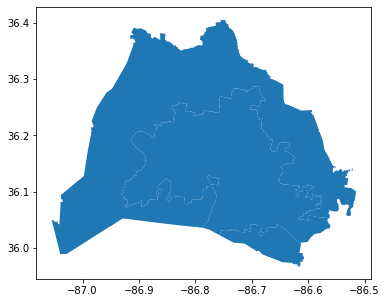

In [9]:
nash.plot(figsize = (6,8))

In [10]:
center = nash.geometry.centroid[1]
nash_center = [center.y, center.x]

In [11]:
nash_map = folium.Map(nash_center)
nash_map

In [12]:
library_geo.head(1)

,notes,latitude,longitude,location/human_address,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,library_name,library_photo_url/url,library_photo_url/description,phone_number,...,:@computed_region_gxvr_9jxz,:@computed_region_gisn_y5cm,:@computed_region_c9xn_skx3,:@computed_region_f73m_vb2k,sunday_opening_time,:@computed_region_cfa7_hbpz,friday_opening_time,friday_closing_time,sunday_closing_time,geometry
0,,35.681402,-85.774444,"{""address"": """", ""city"": """", ""state"": ""TN"", ""zi...",1521.0,2159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-85.77444 35.68140)


In [13]:
nash_lib_map = folium.Map(nash_center, tiles = 'Stamen Toner', zoom_start = 12)

cluster_zip = folium.Map(location = nash_center)
marker_cluster = MarkerCluster().add_to(nash_lib_map)
for row_index, row_values in library_geo.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['library_name']),str(row_values['hoop'])
    marker = folium.Marker(location = loc, popup = pop,icon = folium.Icon(icon = 'book',color = 'lightblue'))
    
    marker.add_to(marker_cluster)


    
nash_lib_map

In [21]:
nash_lib_map = folium.Map(nash_center, tiles = 'Stamen Toner', zoom_start = 12)

cluster_zip = folium.Map(location = nash_center)
marker_cluster = MarkerCluster(icon = 'tool').add_to(nash_lib_map)
for row_index, row_values in library_geo.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['library_name']),str(row_values['hoop'])
    marker = folium.Marker(location = loc, popup = pop,icon = folium.Icon(icon = 'book',color = 'lightblue'))
    
    marker.add_to(nash_lib_map)

for row_index, row_values in projects_geo.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Project Type'])
    marker = folium.Marker(location = loc, popup = pop, icon = folium.Icon(icon='tool'))
    
    marker.add_to(marker_cluster)
    
nash_lib_map